In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics  #to evaluate model


In [7]:
car_ds = pd.read_csv(r'C:\Users\MCC\Downloads\ML\Car Price Prediction\car data.csv')

In [8]:
car_ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
car_ds.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
car_ds.shape

(301, 9)

In [11]:
car_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Categorical Data                              
-Car_Name                           
-Fuel_Type                               
-Transmission                    
-Seller_Type                      


In [17]:
car_ds['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [18]:
print(car_ds.Transmission.value_counts())
print(" ")
print(car_ds.Seller_Type.value_counts())


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
 
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [21]:
#encoding FUel Type
car_ds.replace({'Fuel_Type':{'Petrol':1,'Diesel':2,'CNG':3}}, inplace = True)

#encoding Transmission
car_ds.replace({'Transmission':{'Manual':1,'Automatic':2}}, inplace = True)

#encoding Seller_Type
car_ds.replace({'Seller_Type':{'Dealer':1,'Individual':2}}, inplace = True)




In [22]:
print(car_ds.Fuel_Type.value_counts())
print(" ")
print(car_ds.Transmission.value_counts())
print(" ")
print(car_ds.Seller_Type.value_counts())


Fuel_Type
1    239
2     60
3      2
Name: count, dtype: int64
 
Transmission
1    261
2     40
Name: count, dtype: int64
 
Seller_Type
1    195
2    106
Name: count, dtype: int64


In [23]:
car_ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0


splitting the data into traning data and test data

In [24]:
X = car_ds.drop(['Car_Name','Selling_Price'] , axis = 1) 
Y = car_ds['Selling_Price']

In [26]:
print(X.shape)

(301, 7)


In [29]:
print(Y.shape)

(301,)


#spliting the data into training and testing

In [28]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.1 , random_state = 2) #test size is 10% of total data

Model Traninig

1. Linear Regression
2. lasso Regression
   

In [42]:
#Linear Regression

In [30]:
lin_reg_model = LinearRegression()

In [31]:
lin_reg_model.fit(X_train , Y_train)

LinearRegression()

Model Evaluatuion

In [32]:
#prediction on tranining data
training_data_predict = lin_reg_model.predict(X_train)

In [36]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_predict)
print("Error score = ", error_score)

Error score =  0.8799451660493698


Visualize the actual prices and predicted priced

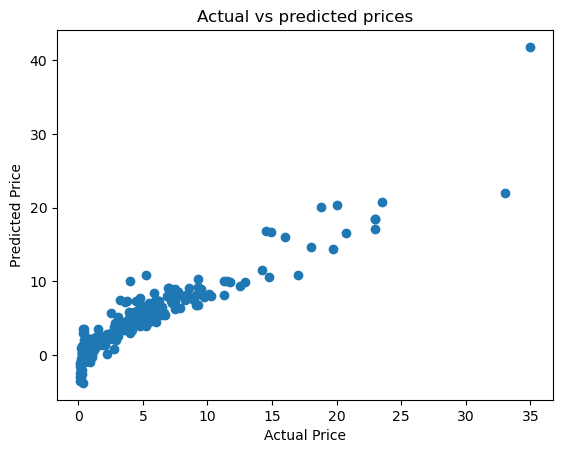

In [38]:
plt.scatter(Y_train,training_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predicted prices")
plt.show()

In [39]:
#prediction on testing data
testing_data_predict = lin_reg_model.predict(X_test)

In [40]:
# R squared error
error_score = metrics.r2_score(Y_test,testing_data_predict)
print("Error score = ", error_score)

Error score =  0.8365766715026883


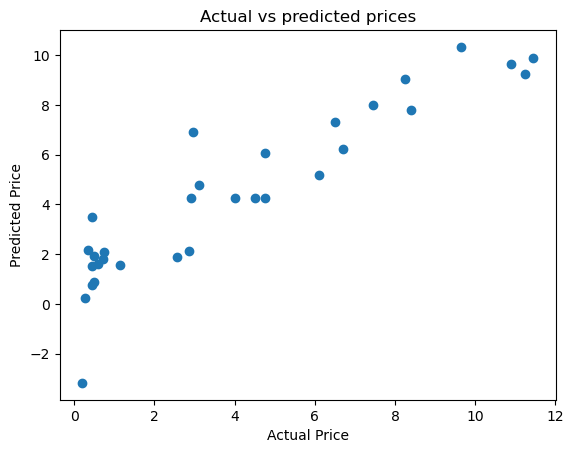

In [41]:
plt.scatter(Y_test,testing_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predicted prices")
plt.show()

In [44]:
#Lasso regression

In [49]:
las_reg_mod = Lasso()

In [50]:
las_reg_mod.fit(X_train,Y_train)

Lasso()

In [52]:
training_data_predict = las_reg_mod.predict(X_train) 

In [57]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_predict)
print("Error score = ", error_score)

Error score =  0.8427856123435794


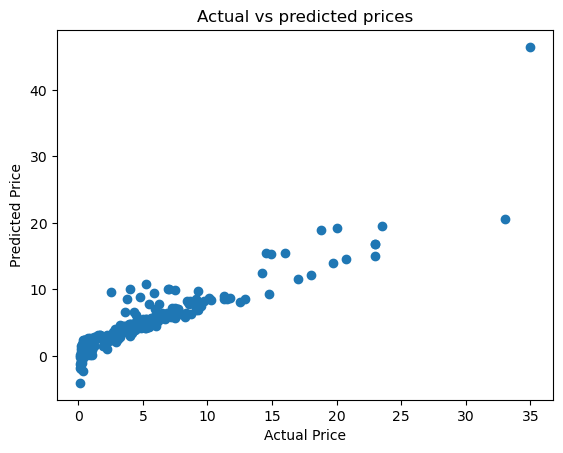

In [56]:
plt.scatter(Y_train,training_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predicted prices")
plt.show()

In [58]:
testing_data_predict = las_reg_mod.predict(X_test) 

# R squared error
error_score = metrics.r2_score(Y_test,testing_data_predict)
print("Error score = ", error_score)

Error score =  0.8709167941173195


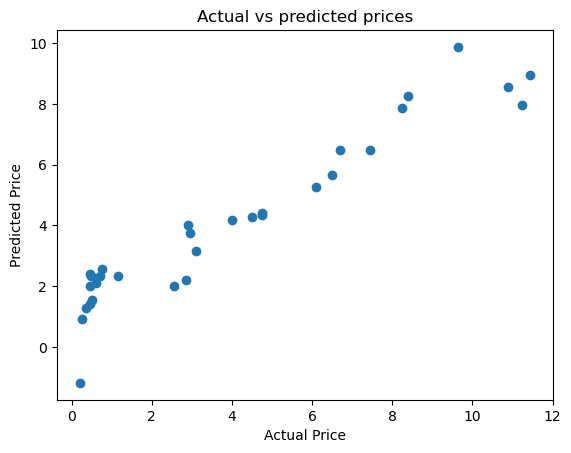

In [59]:
plt.scatter(Y_test,testing_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predicted prices")
plt.show()